# Sentiment analysis by Deep learning approaches (Transformer Based Models)


__Objectives__

The primary purpose of this notebook is to use the sentiment analysis tools (Transformer Based Models) on LabelFilled_TrueGround_dataset and evaluate the performance of deep learning approaches (Transformer Based Models) against the ground true label, analyze the results, etc.

In [34]:
import numpy as np
from scipy.special import softmax
import pandas as pd
from transformers import pipeline

In [35]:
# The path to the dataset that is produced by this notebook.
Transformer_Based_Model_dataset = '../../FYP/3000_analysis_dataset/3000_Transformer_Based_Model_dataset.csv'

# The directory used to store the true ground datasets.
datasets_dir = '../../FYP/Clean_dataset/LabelFilled_TrueGround_dataset/'

In [36]:
df = pd.read_csv(datasets_dir+'2000_news_headlines_TrueGround.csv',encoding='latin-1')

In [37]:
df

,Date,Headlines,Author,Tag Text,True_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative
1,17/03/2018,Meal-ordering app Ritual exposes government em...,The Verge,A couple months after Strava unintentionally e...,NaN
2,17/03/2018,"In Spanish Basque Country, Sampling Cider and ...",New York Times,No one really tells you what to do when you fi...,NaN
3,17/03/2018,Perspectives | Scapegoating Becomes a Pre-Elec...,EurasiaNet,Perspectives | Scapegoating Becomes a Pre-Elec...,NaN
4,17/03/2018,Ready for the new moon? Try this guided ritual...,Well+Good,Mindfulness rockstar Kelly Morris is here to l...,NaN
...,...,...,...,...,...
2195,27/08/2022,"9 New Moon Rituals For Intention Setting, Mani...",Experts - MindBodyGreen,MindBodyGreenNew moons are an excellent time t...,positive
2196,27/08/2022,The Importance of Fire Ritual | Burning Man Jo...,Burning Man Journal,The Importance of Fire Ritual ?? Extracting a ...,NaN
2197,27/08/2022,Pune: Woman Made To Bathe In Public As Per Rit...,In Laws,Outlook IndiaA woman in Maharashtra's Pune has...,negative
2198,27/08/2022,Cult Of The Lamb: The Best Rituals (& When To ...,Game Rant,The Lamb gets one free Ritual when they first ...,NaN


In [38]:
# Filter the df to get df that contain entries with graound true label only.
df_no_missing_column = df[df['True_Label'].notna()]

In [39]:
df_no_missing_column

,Date,Headlines,Author,Tag Text,True_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative
5,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive
6,17/03/2018,"Dead chickens, goats from animal sacrifice rit...",County,WOAISAN ANTONIO - Police are questioning suspe...,negative
14,24/03/2018,"Jepitu farmers, fishermen hold thanksgiving ri...",Jakarta Post,Two fishermen fish using a net at the as part ...,positive
20,24/03/2018,Texas authorities: At least 12 arrested for an...,Unknown,SAN ANTONIO (AP) ?? Authorities in Texas have...,negative
...,...,...,...,...,...
2184,20/08/2022,Police in Nigeria find 20 mummified bodies in ...,The Guardian,The GuardianArmed police officers raided the b...,negative
2189,20/08/2022,Police give more details about 20 corpses dem ...,BBC,BBCPolice for Edo State south-south Nigeria sa...,negative
2195,27/08/2022,"9 New Moon Rituals For Intention Setting, Mani...",Experts - MindBodyGreen,MindBodyGreenNew moons are an excellent time t...,positive
2197,27/08/2022,Pune: Woman Made To Bathe In Public As Per Rit...,In Laws,Outlook IndiaA woman in Maharashtra's Pune has...,negative


Refered the documentation and notebook from https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest (Hugging Face web)


Twitter-roBERTa-base for Sentiment Analysis: According to the brief documentation \cite{TwitterroBERTa2022}\cite{camacho-collados-etal-2022-tweetnlp}\cite{loureiro-etal-2022-timelms}, this model based on Roberta used for sentiment analysis has been trained on 124 million tweets from January 2018 to December 2021 and fine-tuned for sentiment analysis with the TweetEval benchmark dataset. The TweetEval benchmark dataset\cite{tweet_eval}\cite{rosenthal2017semeval} includes data (input tweet and ground truth labels) for seven tasks focusing on different aspects of twitter data analysis and framed as multi-class tweet classification including : irony, hate, offensive, stance, emoji, emotion, and sentiment.

Refer to the code of full classification example from Twitter-roBERTa-base model card for API access\cite{TwitterroBERTa2022}. This model is fine-tuned by TweetEval benchmark dataset for multiclass classification, which produces the probabilities of being classified as positive, negative, and netural respectively after the output logits processed by the softmax function. My ground truth labels only contain positive and negative labels, so I will map the highest score between the positive and negative scores, ignoring the netural score.

In [40]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
TweetPretrained_Reberta_tokenizer = AutoTokenizer.from_pretrained(MODEL)
TweetPretrained_Reberta_config = AutoConfig.from_pretrained(MODEL)

In [42]:
TweetPretrained_Reberta_model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
# Define a function to get the sentiment score
def get_sentiment_result(text):
    encoded_input = TweetPretrained_Reberta_tokenizer(text, return_tensors='pt')
    output = TweetPretrained_Reberta_model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    pos_neg_scores = {}
    
    # Extract only positive and negative scores, ignoring neutral
    for i in range(scores.shape[0]):
        # Get the label like 'Positive', 'Negative', 'Neutral' for the current score
        label = TweetPretrained_Reberta_config.id2label[i]

        if label in ['positive', 'negative']:
            pos_neg_scores[label] = scores[i]
            
    # Return the sentiment with the maximum score
    max_sentiment = max(pos_neg_scores, key=pos_neg_scores.get)
    max_score = pos_neg_scores[max_sentiment]
    
    return max_sentiment

In [44]:
df_TweetPretrained_Reberta = df_no_missing_column.copy()
# Apply sentiment analysis on headline column
df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'] = df_TweetPretrained_Reberta['Headlines'].apply(lambda x: get_sentiment_result(x))

# Apply sentiment analysis on Tag Text column
df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'] = df_TweetPretrained_Reberta['Tag Text'].apply(lambda x: get_sentiment_result(x))

Evaluate the predictions of headlines

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [46]:
TweetPretrained_Reberta_headline_accuracy = accuracy_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'])
TweetPretrained_Reberta_headline_precision = precision_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'], average='binary', pos_label='positive')
TweetPretrained_Reberta_headline_recall = recall_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'], average='binary', pos_label='positive')
TweetPretrained_Reberta_headline_f1 = f1_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'], average='binary', pos_label='positive')

In [47]:
print("Headline Accuracy:", TweetPretrained_Reberta_headline_accuracy)
print("Headline Precision:", TweetPretrained_Reberta_headline_precision)
print("Headline Recall:", TweetPretrained_Reberta_headline_recall)
print("Headline F1 Score:", TweetPretrained_Reberta_headline_f1)

Headline Accuracy: 0.9666666666666667
Headline Precision: 0.9883720930232558
Headline Recall: 0.9139784946236559
Headline F1 Score: 0.9497206703910613


Based on the confusion matrix for headlines, the number of false negative examples is 9 times greater than false positive examples, which suggests that this tweets pretrained Roberta is weaker at classifing true positive examples.

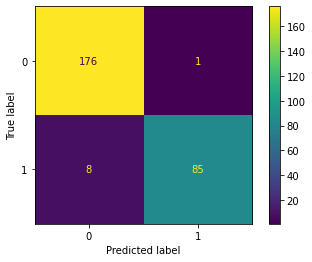

In [48]:
# plot_confusion_matrix
cm = confusion_matrix(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Headlines_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Evaluate the predictions of tag text

In [49]:
TweetPretrained_Reberta_TagText_accuracy = accuracy_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'])
TweetPretrained_Reberta_TagText_precision = precision_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
TweetPretrained_Reberta_TagText_recall = recall_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
TweetPretrained_Reberta_TagText_f1 = f1_score(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'], average='binary', pos_label='positive')

In [50]:
print("Tag text Accuracy:", TweetPretrained_Reberta_TagText_accuracy)
print("Tag text Precision:", TweetPretrained_Reberta_TagText_precision)
print("Tag text Recall:", TweetPretrained_Reberta_TagText_recall)
print("Tag text F1 Score:", TweetPretrained_Reberta_TagText_f1)

Tag text Accuracy: 0.8925925925925926
Tag text Precision: 0.826530612244898
Tag text Recall: 0.8709677419354839
Tag text F1 Score: 0.8481675392670157


Based on the confusion matrix for tagtext, the number of false positive is greater than number of false negative examples and the number of correctly classifed examples are less than the coreectly classified examples in headlines.

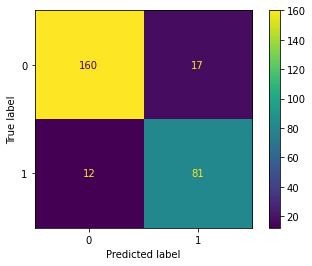

In [51]:
# plot_confusion_matrix
cm = confusion_matrix(df_TweetPretrained_Reberta['True_Label'], df_TweetPretrained_Reberta['TweetPretrained_Reberta_Tag Text_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [52]:
import matplotlib.pyplot as plt

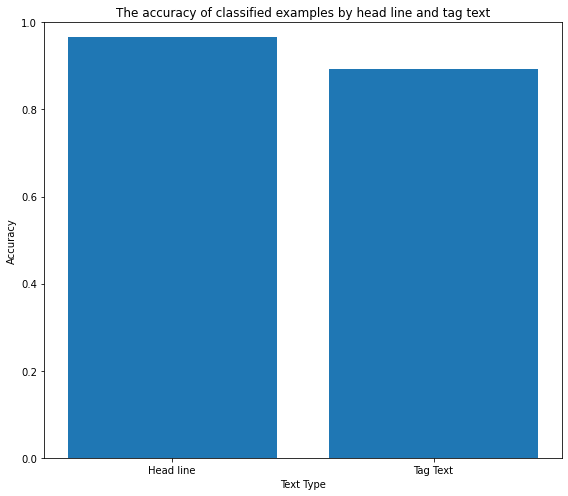

In [53]:
Text_Type = ['Head line', 'Tag Text']
Accuracy = [TweetPretrained_Reberta_headline_accuracy,TweetPretrained_Reberta_TagText_accuracy]
# Create a figure with two subplots
fig, axs = plt.subplots(figsize=(8, 7))

# Plot the second bar chart
axs.bar(Text_Type, Accuracy)
axs.set_xlabel('Text Type')
axs.set_ylabel('Accuracy')
axs.set_title('The accuracy of classified examples by head line and tag text')
axs.set_ylim(ymin=0, ymax=1)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

From the metrics table, we can see that this tweets pretrained Roberta is comprehensively performing poor on longer text than short text, almost the performance on tagtext is like 7 percent lower than headlines.

The performance of this tweets pretrained Roberta on headline text is different from Tag text, from the table we can see that it performs better in terms of headline text, headline text is much shorter than Tag text(a piece of text in news content). 

In [54]:
from tabulate import tabulate

metrics = [["Accuracy", TweetPretrained_Reberta_headline_accuracy,TweetPretrained_Reberta_TagText_accuracy], 
        ["Precision", TweetPretrained_Reberta_headline_precision,TweetPretrained_Reberta_TagText_precision], 
        ["Recall", TweetPretrained_Reberta_headline_recall,TweetPretrained_Reberta_TagText_recall], 
        ["F1 Score", TweetPretrained_Reberta_headline_f1,TweetPretrained_Reberta_TagText_f1]]
  

col_names = ["Metrics", "Headline text","Tag text"]
  

print(tabulate(metrics, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═══════════╤═════════════════╤════════════╕
│    │ Metrics   │   Headline text │   Tag text │
╞════╪═══════════╪═════════════════╪════════════╡
│  0 │ Accuracy  │        0.966667 │   0.892593 │
├────┼───────────┼─────────────────┼────────────┤
│  1 │ Precision │        0.988372 │   0.826531 │
├────┼───────────┼─────────────────┼────────────┤
│  2 │ Recall    │        0.913978 │   0.870968 │
├────┼───────────┼─────────────────┼────────────┤
│  3 │ F1 Score  │        0.949721 │   0.848168 │
╘════╧═══════════╧═════════════════╧════════════╛


Refered the documentation and notebook from https://huggingface.co/siebert/sentiment-roberta-large-english (Hugging Face web)

According to the brief of the refered documentation that the model i am going to load here for sentiment analysis is called SiEBERT, this model is also Roberta based but the version that further fine-tuned and evaluated on 15 datasets from diverse text sources to improve generalization across various types of texts (reviews, tweets, etc.), due to scarcity of my dataset with ground true label, those pretrained and fine-tuned models would be suitable for me to test.

This model does binary sentiment analysis so i can use Hugging Face pipeline to make make prediction easy.

This model also claimed to be better than DistilBERT-based model that i will test it as well.


Citation as required on the web ( do it in my final report as well): 
@article{hartmann2023,

title = {More than a Feeling: Accuracy and Application of Sentiment Analysis},

journal = {International Journal of Research in Marketing},

volume = {40},

number = {1},

pages = {75-87},

year = {2023},

doi = {https://doi.org/10.1016/j.ijresmar.2022.05.005},

url = {https://www.sciencedirect.com/science/article/pii/S0167811622000477},

author = {Jochen Hartmann and Mark Heitmann and Christian Siebert and Christina Schamp},

}

In [119]:
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

In [120]:
df_FineTuned_Diversity_SiEBERT = df_no_missing_column.copy()
# Apply sentiment analysis on headline column
df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] = df_FineTuned_Diversity_SiEBERT['Headlines'].apply(lambda x: sentiment_analysis(x)[0]['label'].lower())

# Apply sentiment analysis on Tag Text column
df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'] = df_FineTuned_Diversity_SiEBERT['Tag Text'].apply(lambda x: sentiment_analysis(x)[0]['label'].lower())

Evaluate the predictions of headlines

In [121]:
FineTuned_Diversity_SiEBERT_headline_accuracy = accuracy_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'])
FineTuned_Diversity_SiEBERT_headline_precision = precision_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'], average='binary', pos_label='positive')
FineTuned_Diversity_SiEBERT_headline_recall = recall_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'], average='binary', pos_label='positive')
FineTuned_Diversity_SiEBERT_headline_f1 = f1_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'], average='binary', pos_label='positive')

In [122]:
print("Headline Accuracy:", FineTuned_Diversity_SiEBERT_headline_accuracy)
print("Headline Precision:", FineTuned_Diversity_SiEBERT_headline_precision)
print("Headline Recall:", FineTuned_Diversity_SiEBERT_headline_recall)
print("Headline F1 Score:", FineTuned_Diversity_SiEBERT_headline_f1)

Headline Accuracy: 0.9333333333333333
Headline Precision: 0.8440366972477065
Headline Recall: 0.989247311827957
Headline F1 Score: 0.9108910891089109


Based on the confusion matrix for headlines, the number of false positive examples is 17 times greater than false negative examples, which suggests that this Roberta based model fine-tuned by diverse text sources is weaker at classifing true negative examples.

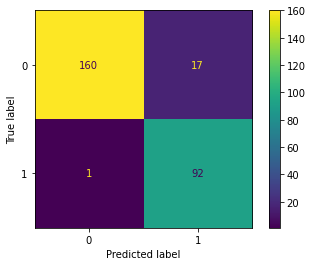

In [123]:
# plot_confusion_matrix
cm = confusion_matrix(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Evaluate the predictions of tag text

In [124]:
FineTuned_Diversity_SiEBERT_TagText_accuracy = accuracy_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'])
FineTuned_Diversity_SiEBERT_TagText_precision = precision_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
FineTuned_Diversity_SiEBERT_TagText_recall = recall_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
FineTuned_Diversity_SiEBERT_TagText_f1 = f1_score(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'], average='binary', pos_label='positive')

In [125]:
print("Tag text Accuracy:", FineTuned_Diversity_SiEBERT_TagText_accuracy)
print("Tag text Precision:", FineTuned_Diversity_SiEBERT_TagText_precision)
print("Tag text Recall:", FineTuned_Diversity_SiEBERT_TagText_recall)
print("Tag text F1 Score:", FineTuned_Diversity_SiEBERT_TagText_f1)

Tag text Accuracy: 0.8037037037037037
Tag text Precision: 0.6612903225806451
Tag text Recall: 0.8817204301075269
Tag text F1 Score: 0.7557603686635945


Based on the confusion matrix for tagtext, the number of false positive is greater than number of false negative examples and the number of correctly classifed examples are less than the coreectly classified examples in headlines.

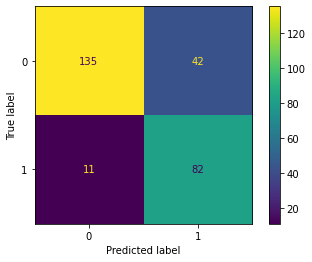

In [126]:
# plot_confusion_matrix
cm = confusion_matrix(df_FineTuned_Diversity_SiEBERT['True_Label'], df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

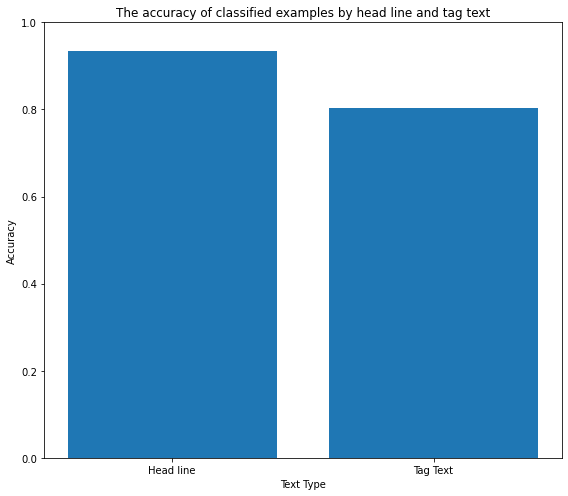

In [127]:
Text_Type = ['Head line', 'Tag Text']
Accuracy = [FineTuned_Diversity_SiEBERT_headline_accuracy,FineTuned_Diversity_SiEBERT_TagText_accuracy]
# Create a figure with two subplots
fig, axs = plt.subplots(figsize=(8, 7))

# Plot the second bar chart
axs.bar(Text_Type, Accuracy)
axs.set_xlabel('Text Type')
axs.set_ylabel('Accuracy')
axs.set_title('The accuracy of classified examples by head line and tag text')
axs.set_ylim(ymin=0, ymax=1)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

From the metrics table, we can see that this Roberta based model fine-tuned by diverse text sources is comprehensively performing poor on longer text than short text, almost the performance on tagtext is like 13 percent lower than headlines.

The performance of this Roberta based model fine-tuned by diverse text sources on headline text is different from Tag text, from the table we can see that it performs better in terms of headline text, headline text is much shorter than Tag text(a piece of text in news content).

In [128]:

Metrics = [["Accuracy", FineTuned_Diversity_SiEBERT_headline_accuracy,FineTuned_Diversity_SiEBERT_TagText_accuracy], 
        ["Precision", FineTuned_Diversity_SiEBERT_headline_precision,FineTuned_Diversity_SiEBERT_TagText_precision], 
        ["Recall", FineTuned_Diversity_SiEBERT_headline_recall,FineTuned_Diversity_SiEBERT_TagText_recall], 
        ["F1 Score", FineTuned_Diversity_SiEBERT_headline_f1,FineTuned_Diversity_SiEBERT_TagText_f1]]
  

col_names = ["Metrics", "Headline text", "Tag text"]
  

print(tabulate(metrics, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═══════════╤═════════════════╤════════════╕
│    │ Metrics   │   Headline text │   Tag text │
╞════╪═══════════╪═════════════════╪════════════╡
│  0 │ Accuracy  │        0.907407 │   0.814815 │
├────┼───────────┼─────────────────┼────────────┤
│  1 │ Precision │        0.904762 │   0.786667 │
├────┼───────────┼─────────────────┼────────────┤
│  2 │ Recall    │        0.817204 │   0.634409 │
├────┼───────────┼─────────────────┼────────────┤
│  3 │ F1 Score  │        0.858757 │   0.702381 │
╘════╧═══════════╧═════════════════╧════════════╛


In [132]:

m = [["Accuracy", FineTuned_Diversity_SiEBERT_headline_accuracy,FineTuned_Diversity_SiEBERT_TagText_accuracy], 
        ["Precision", FineTuned_Diversity_SiEBERT_headline_precision,FineTuned_Diversity_SiEBERT_TagText_precision], 
        ["Recall", FineTuned_Diversity_SiEBERT_headline_recall,FineTuned_Diversity_SiEBERT_TagText_recall], 
        ["F1 Score", FineTuned_Diversity_SiEBERT_headline_f1,FineTuned_Diversity_SiEBERT_TagText_f1]]
  

col_names = ["Metrics", "Headline text", "Tag text"]
  

print(tabulate(m, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═══════════╤═════════════════╤════════════╕
│    │ Metrics   │   Headline text │   Tag text │
╞════╪═══════════╪═════════════════╪════════════╡
│  0 │ Accuracy  │        0.933333 │   0.803704 │
├────┼───────────┼─────────────────┼────────────┤
│  1 │ Precision │        0.844037 │   0.66129  │
├────┼───────────┼─────────────────┼────────────┤
│  2 │ Recall    │        0.989247 │   0.88172  │
├────┼───────────┼─────────────────┼────────────┤
│  3 │ F1 Score  │        0.910891 │   0.75576  │
╘════╧═══════════╧═════════════════╧════════════╛


Refered the documentation and notebook from https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english#training (Hugging Face web)

According to the brief of the refered documentation that the model i am going to load here for sentiment analysis is called distilbert, this model is also BERT based but distilled version of BERT that featured with  Smaller, faster, cheaper, lighter. Thus model fine-tuned by Stanford Sentiment Treebank(sst2) corpora, due to scarcity of my dataset with ground true label, those pretrained and fine-tuned models would be suitable for me to test.

This model does binary sentiment analysis so i can use Hugging Face pipeline to make make prediction easy.

In [65]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [66]:
def distilbert_sentiment_analysis(text):
    
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_class_id = logits.argmax().item()
    return model.config.id2label[predicted_class_id]
    

In [67]:
df_stanford_Sentiment_Treebank_distilbert = df_no_missing_column.copy()
# Apply sentiment analysis on headline column
df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'] = df_stanford_Sentiment_Treebank_distilbert['Headlines'].apply(lambda x: distilbert_sentiment_analysis(x).lower())

# Apply sentiment analysis on Tag Text column
df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'] = df_stanford_Sentiment_Treebank_distilbert['Tag Text'].apply(lambda x: distilbert_sentiment_analysis(x).lower())

Evaluate the predictions of headlines

In [68]:
distilbert_headline_accuracy = accuracy_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'])
distilbert_headline_precision = precision_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'], average='binary', pos_label='positive')
distilbert_headline_recall = recall_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'], average='binary', pos_label='positive')
distilbert_headline_f1 = f1_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'], average='binary', pos_label='positive')

In [69]:
print("Headline Accuracy:", distilbert_headline_accuracy)
print("Headline Precision:", distilbert_headline_precision)
print("Headline Recall:", distilbert_headline_recall)
print("Headline F1 Score:", distilbert_headline_f1)

Headline Accuracy: 0.9074074074074074
Headline Precision: 0.9047619047619048
Headline Recall: 0.8172043010752689
Headline F1 Score: 0.8587570621468926


Based on the confusion matrix for headlines, the number of false negative examples is 2 times greater than false positive examples, which suggests that this distilled bert fine-tuned by Stanford Sentiment Treebank(sst2) corpora is weaker at classifing true positive examples.

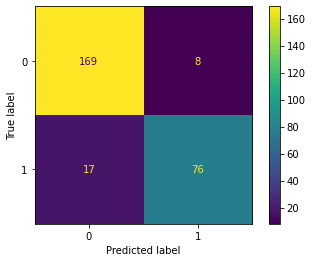

In [70]:
# plot_confusion_matrix
cm = confusion_matrix(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Evaluate the predictions of tag text

In [71]:
distilbert_TagText_accuracy = accuracy_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'])
distilbert_TagText_precision = precision_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
distilbert_TagText_recall = recall_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'], average='binary', pos_label='positive')
distilbert_TagText_f1 = f1_score(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'], average='binary', pos_label='positive')

In [72]:
print("Tag text Accuracy:", distilbert_TagText_accuracy)
print("Tag text Precision:", distilbert_TagText_precision)
print("Tag text Recall:", distilbert_TagText_recall)
print("Tag text F1 Score:", distilbert_TagText_f1)

Tag text Accuracy: 0.8148148148148148
Tag text Precision: 0.7866666666666666
Tag text Recall: 0.6344086021505376
Tag text F1 Score: 0.7023809523809524


Based on the confusion matrix for tagtext, the number of false negative is greater than number of false positive examples and the number of correctly classifed examples are less than the correctly classified examples in headlines.

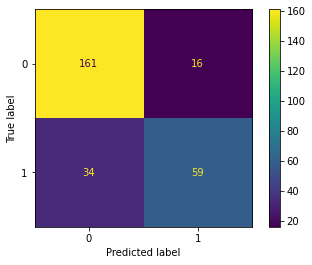

In [73]:
# plot_confusion_matrix
cm = confusion_matrix(df_stanford_Sentiment_Treebank_distilbert['True_Label'], df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

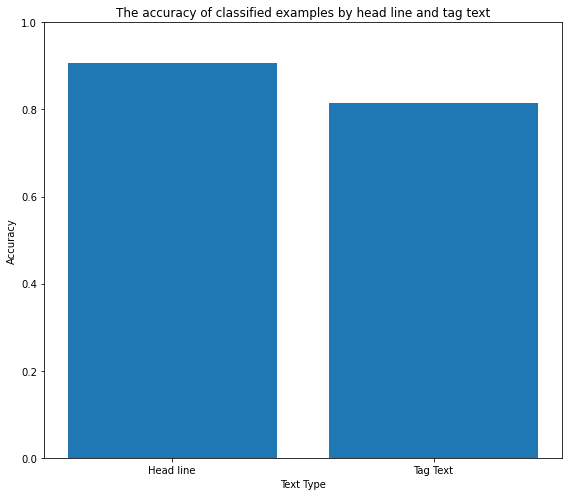

In [74]:
Text_Type = ['Head line', 'Tag Text']
Accuracy = [distilbert_headline_accuracy,distilbert_TagText_accuracy]

fig, axs = plt.subplots(figsize=(8, 7))


axs.bar(Text_Type, Accuracy)
axs.set_xlabel('Text Type')
axs.set_ylabel('Accuracy')
axs.set_title('The accuracy of classified examples by head line and tag text')
axs.set_ylim(ymin=0, ymax=1)
plt.tight_layout()

# Show the chart
plt.show()

From the metrics table, we can see that this Roberta based model fine-tuned by diverse text sources is comprehensively performing poor on longer text than short text, almost the performance on tagtext is like 13 percent lower than headlines.

The performance of this distilled bert fine-tuned by Stanford Sentiment Treebank(sst2) corpora is different from Tag text, from the table we can see that it performs better in terms of headline text, headline text is much shorter than Tag text(a piece of text in news content).

In [75]:
from tabulate import tabulate

metrics = [["Accuracy", distilbert_headline_accuracy,distilbert_TagText_accuracy], 
        ["Precision", distilbert_headline_precision,distilbert_TagText_precision], 
        ["Recall", distilbert_headline_recall,distilbert_TagText_recall], 
        ["F1 Score", distilbert_headline_f1,distilbert_TagText_f1]]
  

col_names = ["Metrics", "Headline text","Tag text"]
  

print(tabulate(metrics, headers=col_names, tablefmt="fancy_grid", showindex="always"))

╒════╤═══════════╤═════════════════╤════════════╕
│    │ Metrics   │   Headline text │   Tag text │
╞════╪═══════════╪═════════════════╪════════════╡
│  0 │ Accuracy  │        0.907407 │   0.814815 │
├────┼───────────┼─────────────────┼────────────┤
│  1 │ Precision │        0.904762 │   0.786667 │
├────┼───────────┼─────────────────┼────────────┤
│  2 │ Recall    │        0.817204 │   0.634409 │
├────┼───────────┼─────────────────┼────────────┤
│  3 │ F1 Score  │        0.858757 │   0.702381 │
╘════╧═══════════╧═════════════════╧════════════╛


###### Get the SiEBERT dataframe that only contain misclassified examples for further analysis

In [76]:
SiEBERT_misclassified_headlines = df_FineTuned_Diversity_SiEBERT[df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] != df_FineTuned_Diversity_SiEBERT['True_Label']]
SiEBERT_misclassified_tagtext = df_FineTuned_Diversity_SiEBERT[df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] != df_FineTuned_Diversity_SiEBERT['True_Label']]

In [77]:
SiEBERT_misclassified_false_positive_headlines_words = df_FineTuned_Diversity_SiEBERT[(df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] == 'positive') & (df_FineTuned_Diversity_SiEBERT['True_Label'] == 'negative')]
SiEBERT_misclassified_false_negative_headlines_words = df_FineTuned_Diversity_SiEBERT[(df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] == 'negative') & (df_FineTuned_Diversity_SiEBERT['True_Label'] == 'positive')]

In [78]:
SiEBERT_misclassified_false_positive_tagtext_words = df_FineTuned_Diversity_SiEBERT[(df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] == 'positive') & (df_FineTuned_Diversity_SiEBERT['True_Label'] == 'negative')]
SiEBERT_misclassified_false_negative_tagtext_words = df_FineTuned_Diversity_SiEBERT[(df_FineTuned_Diversity_SiEBERT['FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label'] == 'negative') & (df_FineTuned_Diversity_SiEBERT['True_Label'] == 'positive')]

In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
stop_words = set(stopwords.words('english'))
stop_words = ["https",".com","'s","'",'.','?',',',':','-','\x80','...','(',')'] + list(stop_words)

In [80]:
def Common_words_plot(misclassified_df,text_type,common_words_number,title):
    misclassified_words = [word_tokenize(text.lower()) for text in misclassified_df[text_type]]
    words_list = [item for sublist in misclassified_words for item in sublist]
    
    # Filter out stop words from word list
    filtered_words_list = [word for word in words_list if word not in stop_words]
    word_freq = Counter(filtered_words_list)
    # Plotting the most common words in misclassified texts
    common_words = word_freq.most_common(common_words_number)
    print(common_words)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(10, 8))
    sns.barplot(list(frequencies), list(words))
    plt.title('Most Common Words in ' + title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    return common_words

[('ritual', 16), ('police', 3), ('child', 2), ('money', 2), ('satanic', 2), ('ogun', 2), ('nigeria', 2), ('killings', 2), ('poland', 1), ('kaczynski', 1), ('ends', 1), ('monthly', 1), ('air', 1), ('crash', 1), ('memory', 1), ('twin', 1), ('peru', 1), ('unearths', 1), ('evidence', 1), ('ancient', 1)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


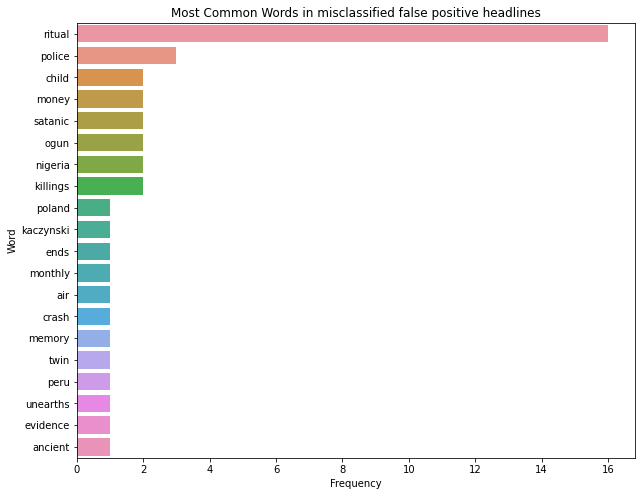

In [81]:
cw = Common_words_plot(SiEBERT_misclassified_false_positive_headlines_words,'Headlines',20,'misclassified false positive headlines')

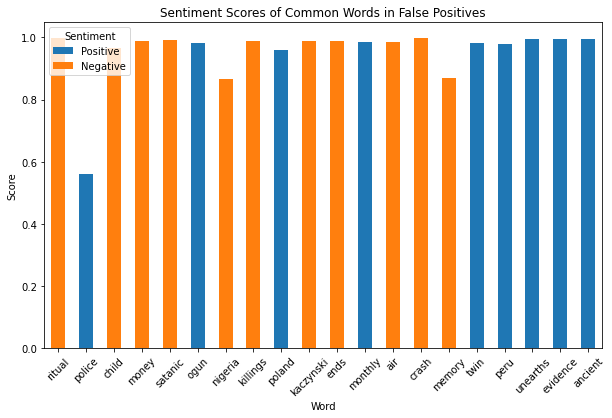

In [82]:
# Example list of common words from false positives
common_words = [tuple[0] for tuple in cw]

# Calculate sentiment scores
# sentiments = [sentiment_analysis(word) for word in common_words]

sentiments = [{sentiment_analysis(word)[0]['label'].lower() : sentiment_analysis(word)[0]['score']} for word in common_words]
# Prepare DataFrame
df_sentiments = pd.DataFrame(sentiments, index=common_words)

# Plot
df_sentiments[['positive', 'negative']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Scores of Common Words in False Positives')
plt.xlabel('Word')
plt.ylabel('Score')
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.xticks(rotation=45)
plt.show()

[('rituals', 1), ('keep', 1), ('athletes', 1), ('grounded', 1), ('help', 1), ('parents', 1)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


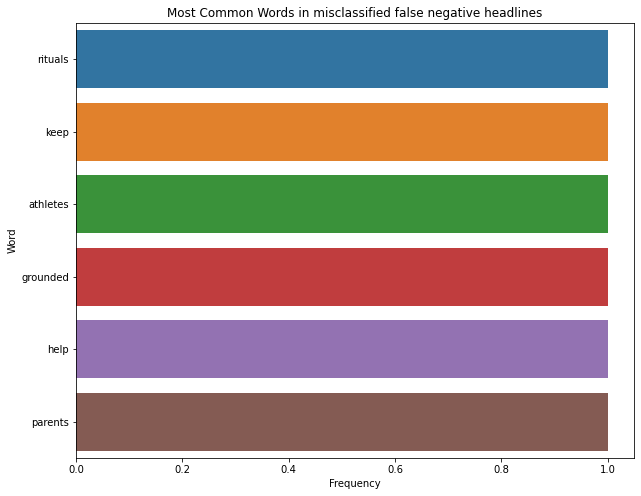

In [83]:
cw = Common_words_plot(SiEBERT_misclassified_false_negative_headlines_words,'Headlines',20,'misclassified false negative headlines')

Use ngrams from nltk package to do N-grams Analysis: Identify frequent 2-grams in misclassified texts to discover any interesting things in word combinations, especially the headlines composed with relatively small number of words for concisely passing the info which provides more evident contexual understanding in terms of sentiment.

In [84]:
from nltk import ngrams

Analysis on false positive headlines cases

In [85]:
misclassified_words = [word_tokenize(text.lower()) for text in SiEBERT_misclassified_false_positive_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]

In [86]:
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('poland', "'s"),
 ("'s", 'kaczynski'),
 ('kaczynski', 'ends'),
 ('ends', 'monthly'),
 ('monthly', 'air'),
 ('air', 'crash'),
 ('crash', 'ritual'),
 ('ritual', 'in'),
 ('in', 'memory'),
 ('memory', 'of'),
 ('of', 'twin'),
 ('twin', 'peru'),
 ('peru', 'unearths'),
 ('unearths', 'evidence'),
 ('evidence', 'of'),
 ('of', 'ancient'),
 ('ancient', 'mass'),
 ('mass', 'child'),
 ('child', 'sacrifice'),
 ('sacrifice', 'ritual'),
 ('ritual', 'ghana'),
 ('ghana', "'s"),
 ("'s", 'first'),
 ('first', 'money'),
 ('money', 'ritual'),
 ('ritual', 'church'),
 ('church', 'emerges'),
 ('emerges', 'millions'),
 ('millions', 'of'),
 ('of', "shi'ites"),
 ("shi'ites", 'express'),
 ('express', 'suffering'),
 ('suffering', 'in'),
 ('in', 'ashura'),
 ('ashura', 'ritual'),
 ('ritual', 'in'),
 ('in', 'iraq'),
 ('iraq', 'mystery'),
 ('mystery', 'infections'),
 ('infections', 'traced'),
 ('traced', 'to'),
 ('to', 'blood-shedding'),
 ('blood-shedding', 'religious'),
 ('religious', 'ritual'),
 ('ritual', 'incoming'

In [87]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams
# Convert to DataFrame for better visualization
df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                  n-gram  Frequency
0           (ritual, in)          3
1      (satanic, ritual)          2
2           (on, ritual)          2
3     (ritual, killings)          2
4           (poland, 's)          1
5        ('s, kaczynski)          1
6      (kaczynski, ends)          1
7        (ends, monthly)          1
8         (monthly, air)          1
9           (air, crash)          1
10       (crash, ritual)          1
11          (in, memory)          1
12          (memory, of)          1
13            (of, twin)          1
14          (twin, peru)          1
15      (peru, unearths)          1
16  (unearths, evidence)          1
17        (evidence, of)          1
18         (of, ancient)          1
19       (ancient, mass)          1
20         (mass, child)          1
21    (child, sacrifice)          1
22   (sacrifice, ritual)          1
23       (ritual, ghana)          1
24           (ghana, 's)          1
25           ('s, first)          1
26        (first, money)    

Analysis on false negative headlines cases

In [88]:
misclassified_words = [word_tokenize(text.lower()) for text in SiEBERT_misclassified_false_negative_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams

[('rituals', 'keep'),
 ('keep', 'these'),
 ('these', 'athletes'),
 ('athletes', 'grounded'),
 ('grounded', '.'),
 ('.', 'they'),
 ('they', 'can'),
 ('can', 'help'),
 ('help', 'parents'),
 ('parents', ','),
 (',', 'too'),
 ('too', '.')]

In [89]:
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams

df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                  n-gram  Frequency
0        (rituals, keep)          1
1          (keep, these)          1
2      (these, athletes)          1
3   (athletes, grounded)          1
4          (grounded, .)          1
5              (., they)          1
6            (they, can)          1
7            (can, help)          1
8        (help, parents)          1
9           (parents, ,)          1
10              (,, too)          1
11              (too, .)          1


Interesting, unlike vader this tool correctly classified those three ritual as negative, what makes it predict wrong?

In [184]:
print("satanic ritual:")
print(sentiment_analysis('satanic ritual'))
print("money ritual:")
print(sentiment_analysis('money ritual'))
print("ritual killings:")
print(sentiment_analysis('ritual killings'))
print("child sacrifice:")
print(sentiment_analysis('child sacrifice'))

satanic ritual:
[{'label': 'NEGATIVE', 'score': 0.9934653639793396}]
money ritual:
[{'label': 'NEGATIVE', 'score': 0.989267110824585}]
ritual killings:
[{'label': 'NEGATIVE', 'score': 0.9969555139541626}]
child sacrifice:
[{'label': 'NEGATIVE', 'score': 0.9910922646522522}]


In [156]:
# Check if any headline contains 'satanic ritual'
filtered_examples = SiEBERT_misclassified_false_positive_headlines_words[SiEBERT_misclassified_false_positive_headlines_words['Headlines'].str.contains('satanic ritual', case=False, na=False)]
filtered_examples

,Date,Headlines,Author,Tag Text,True_Label,FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label,FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label
1675,12/06/2021,Italian nun slain by 3 teen girls in Satanic r...,Crux: Covering all things Catholic,Hours before the beatification ceremony in nor...,negative,positive,positive
1839,13/11/2021,Astroworld Festival Satanic Ritual Conspiracy ...,Insider,Numerous conspiracy theories baselessly claimi...,negative,positive,negative


In [157]:
filtered_examples.iloc[0]['Headlines']

'Italian nun slain by 3 teen girls in Satanic ritual beatified as martyr'

In [196]:
print('Italian nun slain by 3 teen girls in Satanic ritual beatified as martyr: ' + sentiment_analysis('Italian nun slain by 3 teen girls in Satanic ritual beatified as martyr')[0]['label'].lower())
print('Italian nun slain by 3 teen girls in Satanic ritual: ' + sentiment_analysis('Italian nun slain by 3 teen girls in Satanic ritual')[0]['label'].lower())
print('Italian nun slain by 3 teen girls in Satanic ritual beatified: ' + sentiment_analysis('Italian nun slain by 3 teen girls in Satanic ritual beatified')[0]['label'].lower())

print('Peru Unearths Evidence of Ancient Mass Child Sacrifice Ritual: ' + sentiment_analysis('Peru Unearths Evidence of Ancient Mass Child Sacrifice Ritual')[0]['label'].lower())
print('Evidence of Ancient Mass Child Sacrifice Ritual: ' + sentiment_analysis('Evidence of Ancient Mass Child Sacrifice Ritual')[0]['label'].lower())
print('Unearths Evidence of Ancient Mass Child Sacrifice Ritual: ' + sentiment_analysis('Unearths Evidence of Ancient Mass Child Sacrifice Ritual')[0]['label'].lower())

print('Reps declare national emergency on ritual killings in Nigeria: ' + sentiment_analysis('Reps declare national emergency on ritual killings in Nigeria')[0]['label'].lower())
print('Reps declare national emergency on ritual killings: ' + sentiment_analysis('Reps declare national emergency on ritual killings')[0]['label'].lower())

Italian nun slain by 3 teen girls in Satanic ritual beatified as martyr: positive
Italian nun slain by 3 teen girls in Satanic ritual: negative
Italian nun slain by 3 teen girls in Satanic ritual beatified: positive
Peru Unearths Evidence of Ancient Mass Child Sacrifice Ritual: positive
Evidence of Ancient Mass Child Sacrifice Ritual: negative
Unearths Evidence of Ancient Mass Child Sacrifice Ritual: positive
Reps declare national emergency on ritual killings in Nigeria: positive
Reps declare national emergency on ritual killings: negative


In [160]:
# Check if any headline contains 'child sacrifice'
filtered_examples = SiEBERT_misclassified_false_positive_headlines_words[SiEBERT_misclassified_false_positive_headlines_words['Headlines'].str.contains('child sacrifice', case=False, na=False)]
filtered_examples

,Date,Headlines,Author,Tag Text,True_Label,FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label,FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label
77,28/04/2018,Peru Unearths Evidence of Ancient Mass Child S...,teleSUR tv HTTPS (press release) (blog),"The National Geographic team of experts, led b...",negative,positive,negative


In [161]:
filtered_examples.iloc[0]['Headlines']

'Peru Unearths Evidence of Ancient Mass Child Sacrifice Ritual'

In [173]:
sentiment_analysis('Evidence of Ancient Mass Child Sacrifice Ritual')[0]['label'].lower()

'negative'

In [174]:
sentiment_analysis('Unearths Evidence of Ancient Mass Child Sacrifice Ritual')[0]['label'].lower()

'positive'

In [162]:
# Check if any headline contains 'ritual killings'
filtered_examples = SiEBERT_misclassified_false_positive_headlines_words[SiEBERT_misclassified_false_positive_headlines_words['Headlines'].str.contains('ritual killings', case=False, na=False)]

In [175]:
filtered_examples

,Date,Headlines,Author,Tag Text,True_Label,FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label,FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label
1939,12/02/2022,Reps declare national emergency on ritual kill...,Premium Times Nigeria,The House noted that while citizens of other c...,negative,positive,negative
2031,30/04/2022,"What we know about ritual killings for money, ...",Vanguard News,??Money ritual real but there are consequence...,negative,positive,positive


In [176]:
filtered_examples.iloc[0]['Headlines']

'Reps declare national emergency on ritual killings in Nigeria'

In [177]:
sentiment_analysis('Reps declare national emergency on ritual killings')[0]['label'].lower()

'negative'

In [180]:
sentiment_analysis('Reps declare national emergency on ritual killings in Nigeria')[0]['label'].lower()

'positive'

Let's check the only false negative example

In [96]:
SiEBERT_misclassified_false_negative_headlines_words.iloc[0]['Headlines']

'Rituals Keep These Athletes Grounded. They Can Help Parents, Too.'

Wordcloud to see those most appearing common words in headlines or tag text that Vader tend to classified as positive and negative.

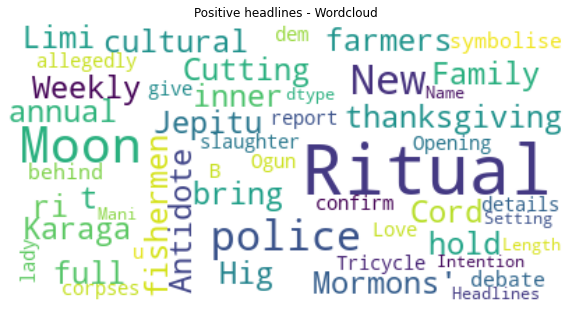

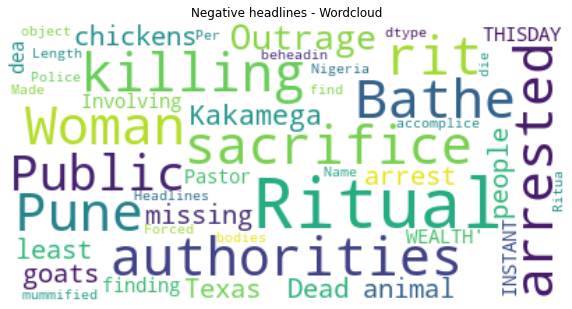

In [97]:
from wordcloud import WordCloud, STOPWORDS
# Wordcloud with positive headlines
Classified_positive_headlines = df_FineTuned_Diversity_SiEBERT['Headlines'][df_FineTuned_Diversity_SiEBERT["FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label"] == 'positive']
stop_words = ["https",'.com'] + list(STOPWORDS)
positive_headlines_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_positive_headlines))
plt.figure(figsize=(10, 6))
plt.title("Positive headlines - Wordcloud")
plt.imshow(positive_headlines_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative headlines
Classified_negative_headlines = df_FineTuned_Diversity_SiEBERT['Headlines'][df_FineTuned_Diversity_SiEBERT["FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label"] == 'negative']
stop_words = ["https"] + list(STOPWORDS)
negative_headlines_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(Classified_negative_headlines))
plt.figure(figsize=(10, 6))
plt.title("Negative headlines - Wordcloud")
plt.imshow(negative_headlines_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###### Get the distillbert dataframe that only contain misclassified examples for further analysis

we see that SIEBERT is weak at classifying true negative examples but distillbert is better instead.

In [98]:
distilbert_misclassified_false_positive_headlines_words = df_stanford_Sentiment_Treebank_distilbert[(df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'] == 'positive') & (df_stanford_Sentiment_Treebank_distilbert['True_Label'] == 'negative')]
distilbert_misclassified_false_negative_headlines_words = df_stanford_Sentiment_Treebank_distilbert[(df_stanford_Sentiment_Treebank_distilbert['Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label'] == 'negative') & (df_stanford_Sentiment_Treebank_distilbert['True_Label'] == 'positive')]

[('ritual', 7), ("'s", 3), ('sacrifice', 2), ("'", 2), ('poland', 1), ('kaczynski', 1), ('ends', 1), ('monthly', 1), ('air', 1), ('crash', 1), ('memory', 1), ('twin', 1), ('peru', 1), ('unearths', 1), ('evidence', 1), ('ancient', 1), ('mass', 1), ('child', 1), ('ghana', 1), ('first', 1)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


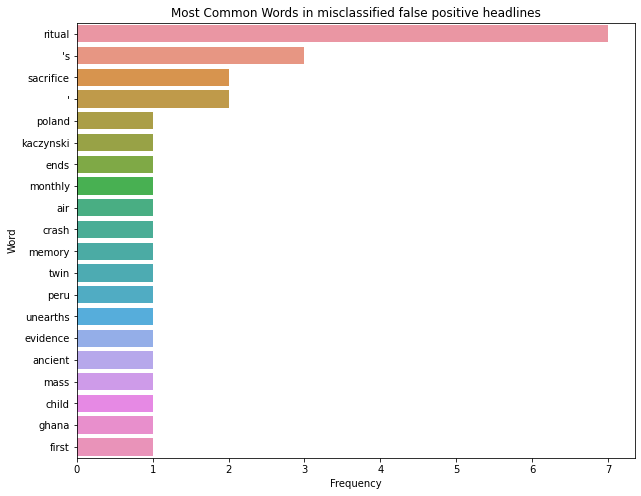

In [99]:
cw = Common_words_plot(distilbert_misclassified_false_positive_headlines_words,'Headlines',20,'misclassified false positive headlines')

[('ritual', 15), ('help', 5), ('moon', 4), (':', 3), ('?', 3), ("'s", 2), ('``', 2), ("''", 2), ('loss', 2), ("'", 2), (',', 2), ('|', 2), ('anxiety', 2), ('weight', 2), ('new', 1), ('cutting', 1), ('cord', 1), ('limiting', 1), ('beliefs', 1), ('mindbodygreen.com', 1)]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


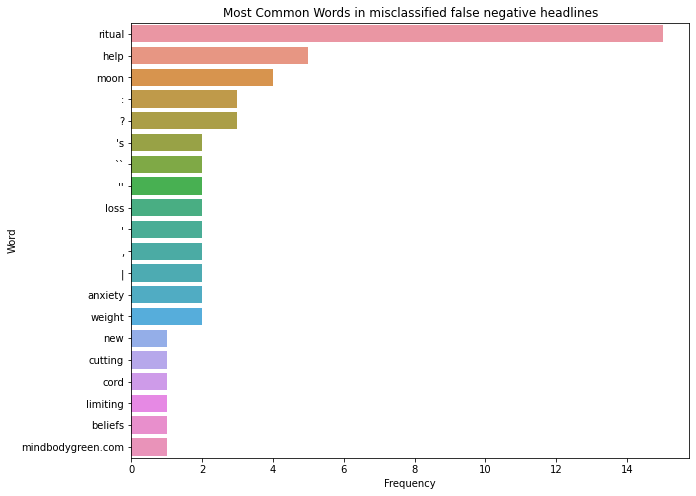

In [100]:
cw = Common_words_plot(distilbert_misclassified_false_negative_headlines_words,'Headlines',20,'misclassified false negative headlines')

Analysis on false positive headlines cases

In [101]:
misclassified_words = [word_tokenize(text.lower()) for text in distilbert_misclassified_false_positive_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]

In [102]:
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)
n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams
# Convert to DataFrame for better visualization
df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                  n-gram  Frequency
0           (ritual, in)          2
1           (poland, 's)          1
2        ('s, kaczynski)          1
3      (kaczynski, ends)          1
4        (ends, monthly)          1
5         (monthly, air)          1
6           (air, crash)          1
7        (crash, ritual)          1
8           (in, memory)          1
9           (memory, of)          1
10            (of, twin)          1
11          (twin, peru)          1
12      (peru, unearths)          1
13  (unearths, evidence)          1
14        (evidence, of)          1
15         (of, ancient)          1
16       (ancient, mass)          1
17         (mass, child)          1
18    (child, sacrifice)          1
19   (sacrifice, ritual)          1
20       (ritual, ghana)          1
21           (ghana, 's)          1
22           ('s, first)          1
23        (first, money)          1
24       (money, ritual)          1
25      (ritual, church)          1
26     (church, emerges)    

Analysis on false negative headlines cases

In [103]:
misclassified_words = [word_tokenize(text.lower()) for text in distilbert_misclassified_false_negative_headlines_words['Headlines']]
words_list = [item for sublist in misclassified_words for item in sublist]
n = 2  # n grams parameter
n_grams = ngrams(words_list, n)
n_grams = list(n_grams)

n_grams_frequency = Counter(n_grams)
most_common_n_grams = n_grams_frequency.most_common(30)  # Adjust the number to see more or fewer common n-grams

df_most_common_n_grams = pd.DataFrame(most_common_n_grams, columns=['n-gram', 'Frequency'])
print(df_most_common_n_grams)

                          n-gram  Frequency
0                   (ritual, to)          4
1                 (moon, ritual)          2
2                  (ritual, for)          2
3                   (ritual, of)          2
4                    (help, you)          2
5                       (a, new)          1
6                    (new, moon)          1
7                 (for, cutting)          1
8                 (cutting, the)          1
9                    (the, cord)          1
10                    (cord, on)          1
11                (on, limiting)          1
12           (limiting, beliefs)          1
13  (beliefs, mindbodygreen.com)          1
14        (mindbodygreen.com, a)          1
15                     (a, full)          1
16                  (full, moon)          1
17                   (to, bring)          1
18                  (bring, out)          1
19                   (out, your)          1
20                 (your, inner)          1
21                 (inner, high)

In [104]:
distilbert_sentiment_analysis('moon ritual')

'POSITIVE'

In [105]:
distilbert_sentiment_analysis('money ritual')

'NEGATIVE'

In [106]:
distilbert_sentiment_analysis('crash ritual')

'NEGATIVE'

In [107]:
distilbert_sentiment_analysis('satanic ritual')

'NEGATIVE'

In [108]:

filtered_examples = distilbert_misclassified_false_negative_headlines_words[distilbert_misclassified_false_negative_headlines_words['Headlines'].str.contains('moon ritual', case=False, na=False)]

In [109]:
filtered_examples.iloc[0]['Headlines']

'A New Moon Ritual For Cutting The Cord On Limiting Beliefs mindbodygreen.com'

Test an example that tag text vader got wrong but classified headline correct at the end of vader notebook


distill bert failed but other two with better performance than distill bert classified it correctly.

In [110]:
distilbert_sentiment_analysis(df_no_missing_column[df_no_missing_column['Headlines'] == '9 Daily Rituals to Boost Your Performance at Work (Infographic)'].iloc[0]['Tag Text'])

'NEGATIVE'

In [111]:
sentiment_analysis(df_no_missing_column[df_no_missing_column['Headlines'] == '9 Daily Rituals to Boost Your Performance at Work (Infographic)'].iloc[0]['Tag Text'])[0]['label'].lower()

'positive'

In [112]:
get_sentiment_result(df_no_missing_column[df_no_missing_column['Headlines'] == '9 Daily Rituals to Boost Your Performance at Work (Infographic)'].iloc[0]['Tag Text'])

'positive'

###### Save dataset

In [113]:
common_columns = ['Date', 'Headlines','Author','Tag Text','True_Label']
Transformer_Based_Model_df = pd.merge(df_TweetPretrained_Reberta, df_FineTuned_Diversity_SiEBERT, on=common_columns)
Transformer_Based_Model_df = pd.merge(Transformer_Based_Model_df, df_stanford_Sentiment_Treebank_distilbert, on=common_columns)

In [114]:
Transformer_Based_Model_df

,Date,Headlines,Author,Tag Text,True_Label,TweetPretrained_Reberta_Headlines_Predicted_Label,TweetPretrained_Reberta_Tag Text_Predicted_Label,FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label,FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label,Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label,Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label
0,17/03/2018,Ritual killing? Outrage in Kakamega as missing...,SDE Entertainment News,"Occurrences of ritual killings in Kakamega, wh...",negative,negative,negative,negative,negative,negative,negative
1,17/03/2018,A New Moon Ritual For Cutting The Cord On Limi...,Unknown,"The Pisces new moon is a juicy, watery, soft, ...",positive,positive,positive,positive,positive,negative,positive
2,17/03/2018,"Dead chickens, goats from animal sacrifice rit...",County,WOAISAN ANTONIO - Police are questioning suspe...,negative,negative,negative,negative,negative,negative,negative
3,24/03/2018,"Jepitu farmers, fishermen hold thanksgiving ri...",Jakarta Post,Two fishermen fish using a net at the as part ...,positive,positive,positive,positive,positive,positive,negative
4,24/03/2018,Texas authorities: At least 12 arrested for an...,Unknown,SAN ANTONIO (AP) ?? Authorities in Texas have...,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...
265,20/08/2022,Police in Nigeria find 20 mummified bodies in ...,The Guardian,The GuardianArmed police officers raided the b...,negative,negative,negative,negative,negative,negative,negative
266,20/08/2022,Police give more details about 20 corpses dem ...,BBC,BBCPolice for Edo State south-south Nigeria sa...,negative,negative,negative,positive,negative,negative,negative
267,27/08/2022,"9 New Moon Rituals For Intention Setting, Mani...",Experts - MindBodyGreen,MindBodyGreenNew moons are an excellent time t...,positive,positive,positive,positive,positive,positive,positive
268,27/08/2022,Pune: Woman Made To Bathe In Public As Per Rit...,In Laws,Outlook IndiaA woman in Maharashtra's Pune has...,negative,negative,negative,negative,negative,negative,negative


In [115]:
print('Saving the dataset that contain the classified sentiment by chatgpt(%s, %s.)' % Transformer_Based_Model_df.shape)
Transformer_Based_Model_df.to_csv(Transformer_Based_Model_dataset, index=False)
Transformer_Based_Model_df.shape, Transformer_Based_Model_df.columns

Saving the dataset that contain the classified sentiment by chatgpt(270, 11.)


((270, 11),
 Index(['Date', 'Headlines', 'Author', 'Tag Text', 'True_Label',
        'TweetPretrained_Reberta_Headlines_Predicted_Label',
        'TweetPretrained_Reberta_Tag Text_Predicted_Label',
        'FineTuned_Diversity_SiEBERT_Headlines_Predicted_Label',
        'FineTuned_Diversity_SiEBERT_Tag Text_Predicted_Label',
        'Stanford_Sentiment_Treebank_distilbert_Headlines_Predicted_Label',
        'Stanford_Sentiment_Treebank_distilbert_Tag Text_Predicted_Label'],
       dtype='object'))